# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Rifqi Afriansyah
- **Email:** rifqiaf7@gmail.com
- **ID Dicoding:** rifqiafr

## Menentukan Pertanyaan Bisnis

- 1. Pada hari libur atau hari tidak libur, manakah yang memiliki rata-rata penyewaan sepeda paling tinggi?
- 2. Apa kondisi cuaca yang paling diminati oleh pengguna sepeda, berdasarkan rata-rata jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Mengimpor pustaka NumPy untuk operasi numerik dan manipulasi data
import numpy as np

# Mengimpor pustaka Pandas untuk manipulasi dan analisis data tabular
import pandas as pd

# Mengimpor pustaka Matplotlib untuk visualisasi data
import matplotlib.pyplot as plt

# Mengimpor pustaka Seaborn untuk visualisasi data statistik yang menarik dan informatif
import seaborn as sn


## Data Wrangling

### Gathering Data

In [20]:
# Memuat data dari URL yang disediakan ke dalam DataFrame 'day_df' menggunakan fungsi pd.read_csv()
day_df = pd.read_csv("https://raw.githubusercontent.com/rifqiafr/Bike-sharing-dataset/master/data/day.csv")

# Menampilkan lima baris pertama dari DataFrame 'day_df' untuk memeriksa struktur dan konten data
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
# Memuat data dari URL yang disediakan ke dalam DataFrame 'hour_df' menggunakan fungsi pd.read_csv()
hour_df = pd.read_csv("https://raw.githubusercontent.com/rifqiafr/Bike-sharing-dataset/master/data/hour.csv")

# Menampilkan lima baris pertama dari DataFrame 'hour_df' untuk memeriksa struktur dan konten data
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [22]:
# Memberikan ringkasan informasi tentang DataFrame 'day_df'
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [23]:
# Menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom DataFrame 'day_df'
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [24]:
# Mencetak jumlah duplikasi dalam DataFrame 'day_df'
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
# Menghasilkan ringkasan statistik dari setiap kolom dalam DataFrame 'day_df'
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [26]:
# Memberikan ringkasan informasi tentang DataFrame 'hour_df'
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [27]:
# Menghitung jumlah nilai unik dalam setiap kolom DataFrame 'hour_df'
hour_df.nunique()


instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [28]:
# Mencetak jumlah duplikat dalam DataFrame 'hour_df'
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# Menghasilkan ringkasan statistik dari DataFrame 'hour_df'
hour_df.describe()


Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Semua tipe data sudah sesuai dan tidak ada masalah

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
#Menggabungkan data frame
bike_df = hour_df.merge(day_df, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [30]:
# Membuat kamus yang mengaitkan kode cuaca dengan label cuaca yang sesuai
weather_labels = {
    1: 'Cerah',
    2: 'Kabut',
    3: 'Curah Hujan Ringan',
    4: 'Curah Hujan Lebat'
}

# Menambahkan kolom 'weather_label' ke dalam DataFrame 'bike_df' yang sesuai dengan label cuaca berdasarkan kode cuaca pada kolom 'weathersit_day'
# Menggunakan metode map() untuk memetakan kode cuaca ke label cuaca yang sesuai menggunakan kamus yang telah dibuat sebelumnya
bike_df['weather_label'] = bike_df['weathersit_day'].map(weather_labels)

In [31]:
# Memanggil fungsi describe() pada DataFrame 'bike_df'
# include="all" digunakan untuk menyertakan kolom-kolom dengan tipe data non-numerik dalam rangkuman statistik
bike_df.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


In [32]:
# Mengelompokkan data dalam DataFrame 'bike_df' berdasarkan label cuaca ('weather_label')
# Kemudian, menghitung rata-rata jumlah sepeda yang dipinjam ('cnt_day') untuk setiap kelompok cuaca
# Hasilnya disimpan dalam sebuah DataFrame baru
# Reset index digunakan untuk mengatur ulang indeks DataFrame agar lebih mudah dibaca
# Akhirnya, hasilnya diurutkan berdasarkan rata-rata jumlah sepeda yang dipinjam ('cnt_day') dari yang terkecil ke yang terbesar
bike_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,weather_label,cnt_day
1,Curah Hujan Ringan,1914.700855
2,Kabut,4062.717595
0,Cerah,4895.177083


In [33]:
# Mengelompokkan DataFrame 'bike_df' berdasarkan kolom 'hr', yang mewakili jam dalam sehari
# kemudian, dilakukan penghitungan rata-rata jumlah sepeda yang disewakan ('cnt_hour') untuk setiap jam
# reset_index() digunakan untuk mengembalikan indeks grup sebagai kolom, sehingga hasilnya berupa DataFrame baru dengan indeks yang direset
bike_df.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [34]:
# Mengelompokkan dataframe bike_df berdasarkan kolom 'holiday_day', kemudian menghitung rata-rata 'cnt_day' (jumlah penyewaan sepeda) untuk setiap grup
# reset_index() digunakan untuk mengembalikan indeks grup sebagai kolom, sehingga hasilnya berupa DataFrame baru
# sort_values("cnt_day") mengurutkan hasil berdasarkan nilai rata-rata 'cnt_day' dari yang terkecil ke yang terbesar
bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


In [35]:
# Menggunakan atribut 'registered_hour' dari dataframe bike_df yang berisi jumlah sepeda yang didaftarkan pada setiap jam
# sum() digunakan untuk menjumlahkan semua nilai dalam kolom 'registered_hour', sehingga menghasilkan total jumlah sepeda yang didaftarkan
bike_df.registered_hour.sum()

2672662

## Visualization & Explanatory Analysis

### Pertanyaan 1:


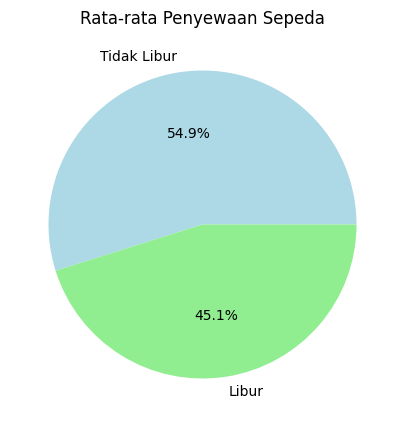

In [37]:
import matplotlib.pyplot as plt

# Data
avg_holiday = bike_df.groupby('holiday_day')['cnt_day'].mean()

# Labels
labels = ['Tidak Libur', 'Libur']

# Plot
plt.figure(figsize=(8, 5))
plt.pie(avg_holiday, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])

# Judul
plt.title('Rata-rata Penyewaan Sepeda')

# Tampilkan plot
plt.show()


### Pertanyaan 2:

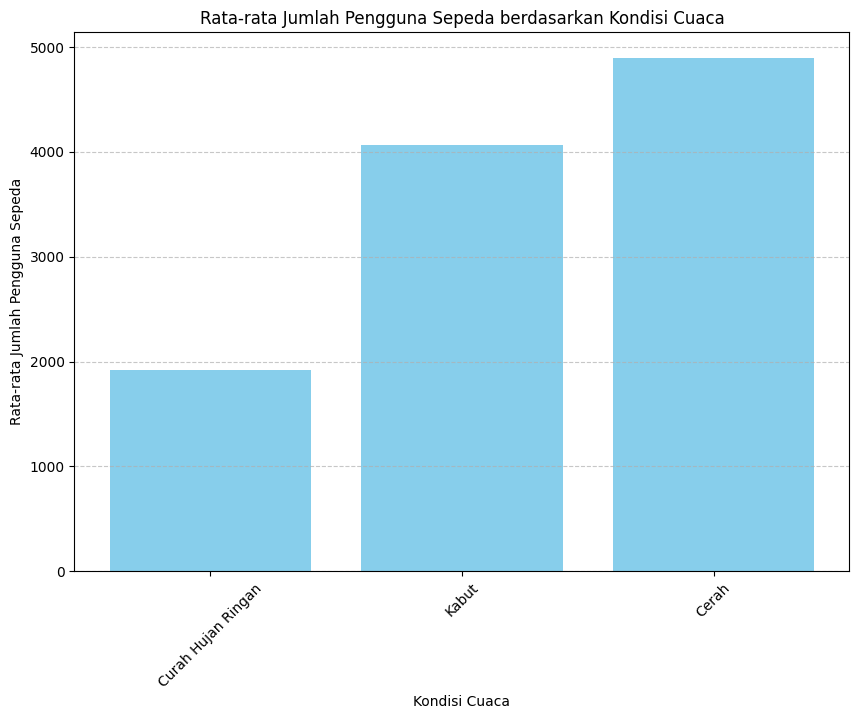

In [38]:
# Melakukan pengelompokan berdasarkan label cuaca dan menghitung rata-rata jumlah pengguna sepeda
weather_avg_cnt = bike_df.groupby('weather_label')['cnt_day'].mean().reset_index()

# Mengurutkan berdasarkan rata-rata jumlah pengguna sepeda
weather_avg_cnt_sorted = weather_avg_cnt.sort_values("cnt_day")

# Membuat plot visualisasi
plt.figure(figsize=(10, 7))
plt.bar(weather_avg_cnt_sorted['weather_label'], weather_avg_cnt_sorted['cnt_day'], color='skyblue')
plt.title('Rata-rata Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

# 1. Conclution Pertanyaan 1
 Rata -rata penyewaan sepeda pada hari libur lebih rendah dibanding hari tidak libur. Hal ini karena pada hari libur biasanya harga penyewaan sepeda meningkat lebih mahal dibanding hari kerja (senin - jumat). Oleh karena itu, banyak orang yang menyewa di hari tidak libur

# 2. Conclution pertanyaan 2
Berdasarkan dari data visualisasi diatas dapat disimpulkan:
Rata-rata jumlah pengguna sepeda tertinggi terjadi pada cuaca cerah, yaitu hampir 5000 pengguna.
Rata-rata jumlah pengguna sepeda terendah terjadi pada cuaca hujan ringan, yaitu hampir 2000 pengguna.
Rata-rata jumlah pengguna sepeda pada cuaca berawan dan kabut berada di antara cuaca cerah dan hujan lebat dengan jumlah 4000 pengguna.



In [ ]:
#Menyimpan DataFrame 'bike_df' ke dalam file CSV dengan nama "bike.csv" tanpa menyertakan indeks baris.
bike_df.to_csv("bike.csv", index=False)